In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 4] # sets the size of figures in this notebook

data = pd.read_csv("ExtractedTweets.csv")

In [1]:
#average number of words and characters per tweet

avchar = [np.mean([len(x) for x in data[data.Party=="Democrat"].Tweet]),
          np.mean([len(x) for x in data[data.Party=="Republican"].Tweet]),
          np.mean([len(x) for x in data.Tweet])]

avword = [np.mean([len(x.split()) for x in data[data.Party=="Democrat"].Tweet]),
          np.mean([len(x.split()) for x in data[data.Party=="Republican"].Tweet]),
          np.mean([len(x.split()) for x in data.Tweet])]

sdchar = [np.sqrt(np.var([len(x) for x in data[data.Party=="Democrat"].Tweet])),
          np.sqrt(np.var([len(x) for x in data[data.Party=="Republican"].Tweet])),
          np.sqrt(np.var([len(x) for x in data.Tweet]))]

sdword = [np.sqrt(np.var([len(x.split()) for x in data[data.Party=="Democrat"].Tweet])),
          np.sqrt(np.var([len(x.split()) for x in data[data.Party=="Republican"].Tweet])),
          np.sqrt(np.var([len(x.split()) for x in data.Tweet]))]

plt.rcParams['figure.figsize'] = [16, 5]

plt.subplot(1,2,1)
plt.bar(range(3),avchar,color=["royalblue","crimson","grey"],yerr = sdchar,capsize=10)
plt.xticks(range(3),["Democrat","Republican","Total"])
plt.ylabel("characters")
plt.title("Average number of characters per tweet")

plt.subplot(1, 2, 2)
plt.bar(range(3),avword,color=["royalblue","crimson","grey"],yerr = sdword,capsize=10)
plt.xticks(range(3),["Democrat","Republican","Total"])
plt.ylabel("words")
plt.title("Average number of words per tweet")

NameError: name 'np' is not defined

Text(0.5, 1.0, 'Average number of words per tweet')

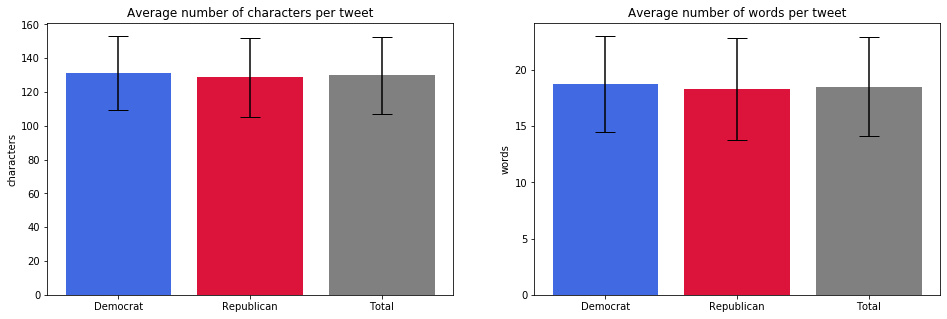

In [17]:
demhandles = [handle for handle in set(data[data.Party=="Democrat"].Handle.values)]

len(demhandles)

211

In [18]:
rephandles = [handle for handle in set(data[data.Party=="Republican"].Handle.values)]

len(rephandles)

222

In [133]:
demtweets = data[data.Party=="Democrat"].Tweet.values

demhash = [word for word in " ".join(demtweets).split() if word.startswith("#")]

d = {}

for word in demhash:
    d[word] = d.get(word,0) + 1

dh = pd.DataFrame({"hash":list(d.keys()),"num":list(d.values())})

dh = dh.sort_values("num",ascending=False).head()

dh

,hash,num
56,#GOPTaxScam,457
306,#DACA,192
1,#NetNeutrality,187
167,#2020Census,95
476,#SOTU,94


In [131]:
reptweets = data[data.Party=="Republican"].Tweet.values

rephash = [word for word in " ".join(reptweets).split() if word.startswith("#")]

d = {}

for word in rephash:
    d[word] = d.get(word,0) + 1

rh = pd.DataFrame({"hash":list(d.keys()),"num":list(d.values())})

rh = rh.sort_values("num",ascending=False).head()

rh

,hash,num
21,#TaxReform,425
13,#TaxCutsandJobsAct,338
7,#taxreform,235
257,#SOTU,213
105,#TaxDay,125


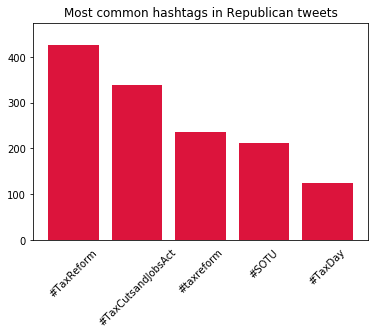

In [137]:
plt.bar(range(5),rh.num,color="crimson")
plt.xticks(np.arange(0,5), rh.hash, rotation=45)
plt.tick_params(axis='x',which='both',bottom=False)
plt.title("Most common hashtags in Republican tweets")
plt.ylim([0,475]);

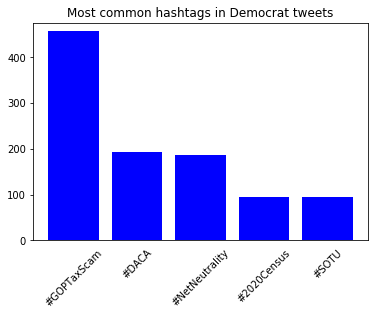

In [138]:
plt.bar(range(5),dh.num,color="blue")
plt.xticks(np.arange(0,5), dh.hash, rotation=45)
plt.tick_params(axis='x',which='both',bottom=False)
plt.title("Most common hashtags in Democrat tweets")
plt.ylim([0,475]);